In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento del dataset
df = pd.read_csv("common_passwords.csv")  # Modifica il path se necessario
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Caricamento dataset
df = pd.read_csv("common_passwords.csv")
# 📊 Istogramma della lunghezza
fig = px.histogram(df, x="length", nbins=20, opacity=0.85,
                   title="🔐 Distribuzione della Lunghezza delle Password",
                   template="plotly_dark", color_discrete_sequence=["deepskyblue"])
fig.update_layout(plot_bgcolor="#050b18", paper_bgcolor="#050b18", font=dict(color="white"),
                  xaxis_title="Lunghezza", yaxis_title="Frequenza")
fig.show()
# 🧱 Barre impilate: tipo di carattere
df_bar = df.groupby("length")[["num_chars", "num_digits", "num_special"]].mean().reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(name='Lettere', x=df_bar["length"], y=df_bar["num_chars"], marker_color='lightskyblue'))
fig.add_trace(go.Bar(name='Cifre', x=df_bar["length"], y=df_bar["num_digits"], marker_color='royalblue'))
fig.add_trace(go.Bar(name='Speciali', x=df_bar["length"], y=df_bar["num_special"], marker_color='mediumblue'))
fig.update_layout(barmode='stack',
    title="🧱 Composizione media dei caratteri per lunghezza",
    xaxis_title="Lunghezza", yaxis_title="Media per tipo",
    template="plotly_dark", plot_bgcolor="#050b18", paper_bgcolor="#050b18",
    font=dict(color="white"))
fig.show()



C:\Users\ab161\AppData\Local\Temp\ipykernel_9076\3407483545.py:28: UserWarning:

Glyph 128272 (\N{CLOSED LOCK WITH KEY}) missing from font(s) DejaVu Sans.

c:\Users\ab161\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128272 (\N{CLOSED LOCK WITH KEY}) missing from font(s) DejaVu Sans.



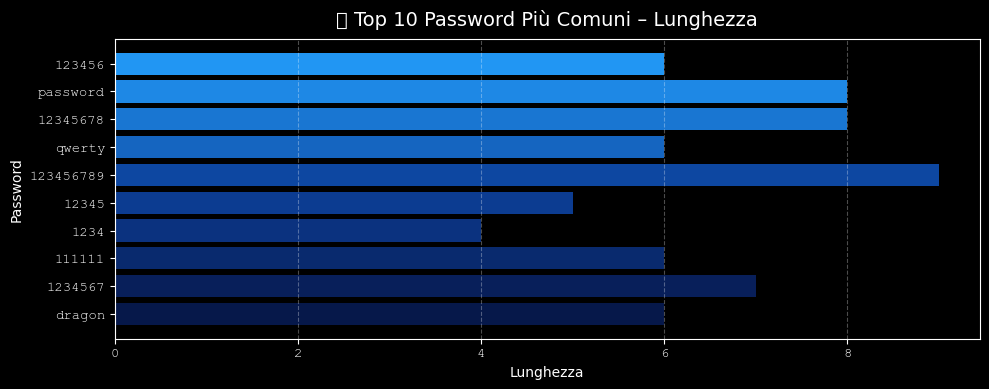

C:\Users\ab161\AppData\Local\Temp\ipykernel_9076\3407483545.py:72: UserWarning:

Glyph 128203 (\N{CLIPBOARD}) missing from font(s) DejaVu Sans.

c:\Users\ab161\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128203 (\N{CLIPBOARD}) missing from font(s) DejaVu Sans.



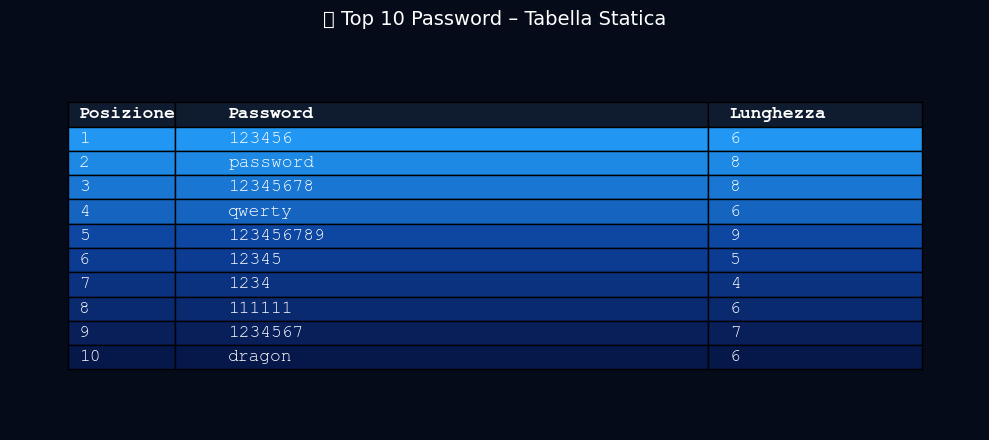

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Caricamento dataset
df = pd.read_csv("common_passwords.csv")
top10 = df.head(10).copy()
top10["Posizione"] = range(1, 11)

# === BAR CHART ORIZZONTALE – Stile Dark, Rettangolare ===
plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(10, 4))  # rettangolare compatto

bar_colors = [
    "#2196f3", "#1e88e5", "#1976d2", "#1565c0", "#0d47a1",
    "#0c3c91", "#0b327f", "#092a6e", "#081f5a", "#06184a"
]

ax.barh(top10["password"], top10["length"], color=bar_colors)
ax.set_title("🔐 Top 10 Password Più Comuni – Lunghezza", fontsize=14, pad=10)
ax.set_xlabel("Lunghezza")
ax.set_ylabel("Password")
ax.invert_yaxis()
ax.grid(axis="x", linestyle="--", alpha=0.3)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname("Courier New")

plt.tight_layout()
plt.show()

# === TABELLA STATICA – Rettangolare, Dark Style ===
fig, ax = plt.subplots(figsize=(10, 4.5))  # layout largo
ax.axis('off')

# Dati per la tabella
table_data = [
    ["Posizione", "Password", "Lunghezza"]
] + list(top10[["Posizione", "password", "length"]].values)

# Creazione tabella
table = ax.table(
    cellText=table_data,
    colLabels=None,
    cellLoc='left',
    loc='center',
    colWidths=[0.1, 0.5, 0.2]
)

# Stile tabella
table.auto_set_font_size(False)
table.set_fontsize(13)
table.scale(1.1, 1.3)

header_color = "#0f1c2f"
row_colors = bar_colors  # stessi colori della barra

# Header
for i in range(3):
    cell = table[(0, i)]
    cell.set_facecolor(header_color)
    cell.set_text_props(color='white', fontname='Courier New', weight='bold')

# Righe
for row in range(1, 11):
    for col in range(3):
        cell = table[(row, col)]
        cell.set_facecolor(row_colors[row - 1])
        cell.set_text_props(color='white', fontname='Courier New')

fig.patch.set_facecolor("#050b18")
plt.title("📋 Top 10 Password – Tabella Statica", fontsize=14, pad=12, color='white')
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
import plotly.graph_objects as go

# Caricamento dataset
df = pd.read_csv("common_passwords.csv")

# === 1. Istogramma migliorato ===
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=df["length"],
    nbinsx=20,
    marker_color="#42a5f5",  # azzurro medio leggibile
    opacity=0.88,
    hoverlabel=dict(font_family="Courier New", font_size=13)
))

fig.update_layout(
    title="🔐 Distribuzione della Lunghezza delle Password",
    title_font=dict(size=20, family="Arial", color="white"),
    template="plotly_dark",
    plot_bgcolor="#050b18",
    paper_bgcolor="#050b18",
    xaxis=dict(title="Lunghezza", gridcolor="rgba(255,255,255,0.05)"),
    yaxis=dict(title="Frequenza", gridcolor="rgba(255,255,255,0.05)"),
    font=dict(color="white", family="Courier New")
)
fig.show()

# === 2. Barre impilate con colori ben differenziati ===
df_bar = df.groupby("length")[["num_chars", "num_digits", "num_special"]].mean().reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(name='Lettere', x=df_bar["length"], y=df_bar["num_chars"], marker_color="#42a5f5"))   # azzurro chiaro
fig.add_trace(go.Bar(name='Cifre', x=df_bar["length"], y=df_bar["num_digits"], marker_color="#512da8"))   # blu molto scuro
fig.add_trace(go.Bar(name='Simboli', x=df_bar["length"], y=df_bar["num_special"], marker_color="#0d47a1"))  # viola/blu scuro

fig.update_layout(
    barmode='stack',
    title="🧱 Composizione Media dei Caratteri per Lunghezza",
    title_font=dict(size=20, family="Arial", color="white"),
    xaxis_title="Lunghezza",
    yaxis_title="Media Caratteri",
    template="plotly_dark",
    plot_bgcolor="#050b18",
    paper_bgcolor="#050b18",
    font=dict(color="white", family="Courier New")
)
fig.show()


In [12]:
import pandas as pd
import plotly.graph_objects as go

# Carica il dataset
df = pd.read_csv("common_passwords.csv")

# Istogramma curato per distribuzione lunghezze
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df["length"],
    nbinsx=14,
    marker=dict(
        color="#42a5f5",  # azzurro coerente
        line=dict(color="#0f1c2f", width=1.2)
    ),
    opacity=0.9,
    hovertemplate="Lunghezza %{x}<br>Frequenza: %{y}",
    name=""
))

fig.update_layout(
    title="📊 Distribuzione delle Lunghezze delle Password",
    xaxis_title="Lunghezza",
    yaxis_title="Numero di Password",
    plot_bgcolor="#050b18",
    paper_bgcolor="#050b18",
    font=dict(color="white", family="Courier New"),
    margin=dict(l=80, r=80, t=100, b=80),
    xaxis=dict(
        tickmode='linear',
        tick0=1,
        dtick=1,
        showgrid=False,
        linecolor="#666",
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        showgrid=False,
        linecolor="#666",
        tickfont=dict(size=12)
    ),
    bargap=0.1
)

fig.show()


C:\Users\ab161\AppData\Local\Temp\ipykernel_9076\2435607145.py:33: UserWarning:

Glyph 128272 (\N{CLOSED LOCK WITH KEY}) missing from font(s) DejaVu Sans.

c:\Users\ab161\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128272 (\N{CLOSED LOCK WITH KEY}) missing from font(s) DejaVu Sans.



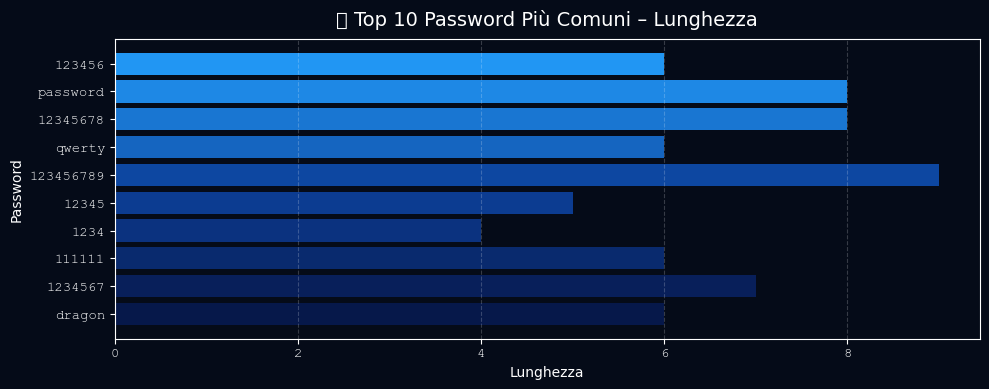

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Caricamento dataset
df = pd.read_csv("common_passwords.csv")
top10 = df.head(10).copy()
top10["Posizione"] = range(1, 11)

# === BAR CHART ORIZZONTALE – Rettangolare, sfondo #050b18 ===
fig, ax = plt.subplots(figsize=(10, 4))
fig.patch.set_facecolor('#050b18')   # sfondo figura
ax.set_facecolor('#050b18')          # sfondo assi

bar_colors = [
    "#2196f3", "#1e88e5", "#1976d2", "#1565c0", "#0d47a1",
    "#0c3c91", "#0b327f", "#092a6e", "#081f5a", "#06184a"
]

ax.barh(top10["password"], top10["length"], color=bar_colors)

ax.set_title("🔐 Top 10 Password Più Comuni – Lunghezza", fontsize=14, pad=10, color='white')
ax.set_xlabel("Lunghezza", color='white')
ax.set_ylabel("Password", color='white')

ax.tick_params(colors='white')
ax.invert_yaxis()
ax.grid(axis="x", linestyle="--", alpha=0.2, color="white")

# Font coerente
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname("Courier New")

plt.tight_layout()
plt.show()


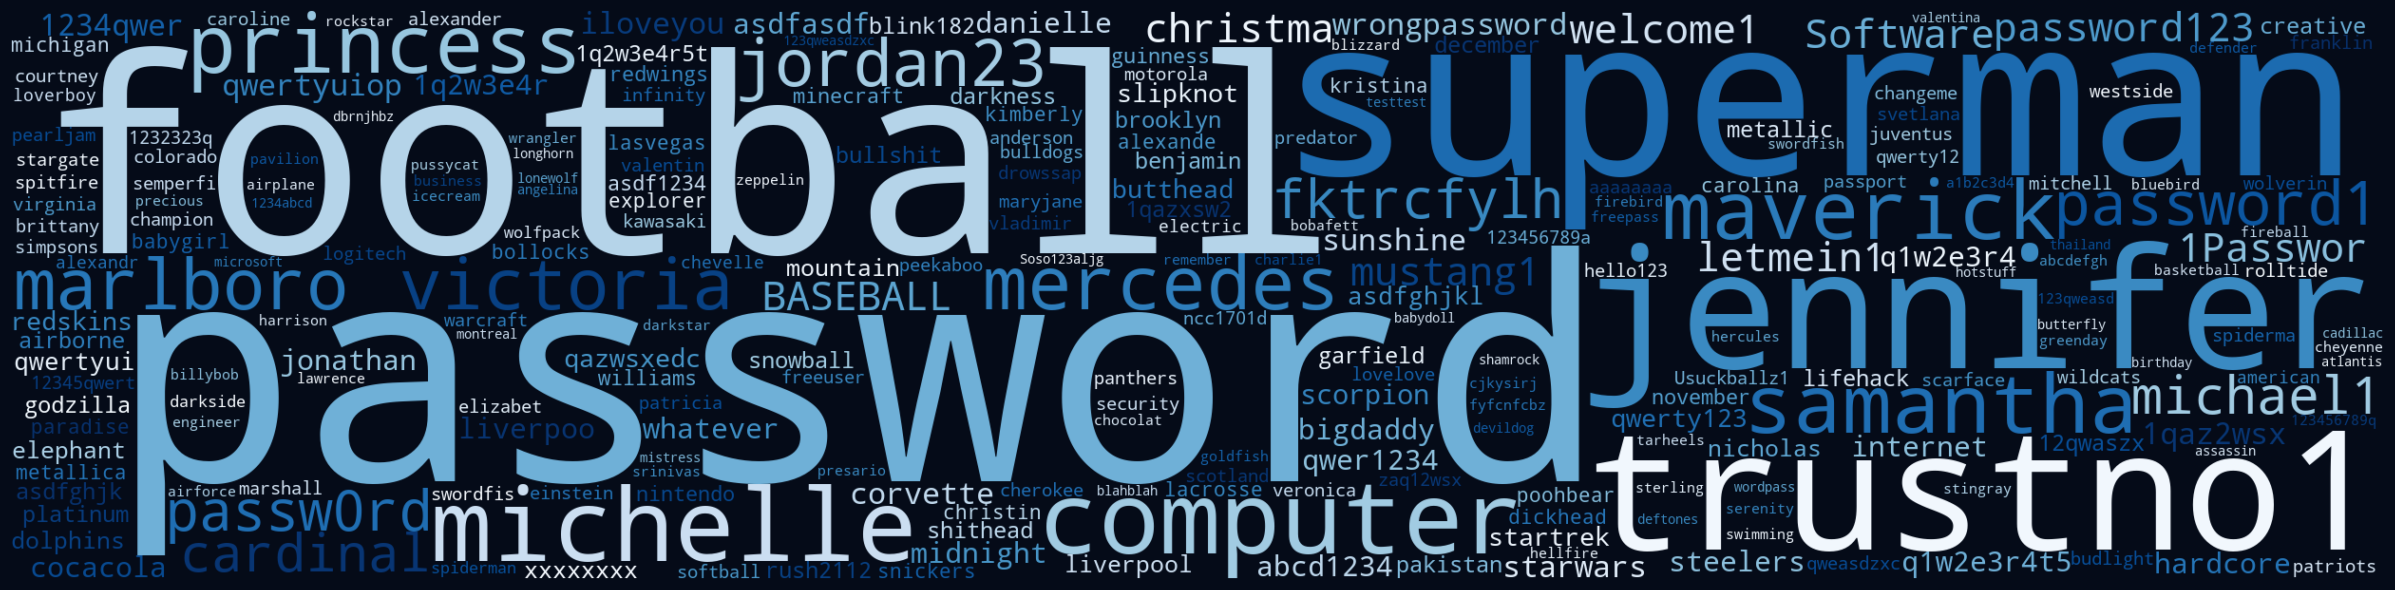

In [16]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Caricamento dataset
df = pd.read_csv("common_passwords.csv")

# Filtro: simboli presenti oppure lunghezza >= 8
filtered = df[(df['num_special'] > 0) | (df['length'] >= 8)]
text = " ".join(filtered["password"])

# Crea wordcloud larga e bassa
wc = WordCloud(
    width=2500,             # molto più largo
    height=600,             # basso ma leggibile
    background_color="#050b18",
    colormap="Blues",
    prefer_horizontal=1,
    max_words=250,
    font_path=None
).generate(text)

# Plot largo
fig, ax = plt.subplots(figsize=(25, 6), facecolor="#050b18")
ax.imshow(wc, interpolation="bilinear")
ax.set_facecolor("#050b18")
ax.axis("off")
plt.tight_layout()
plt.show()


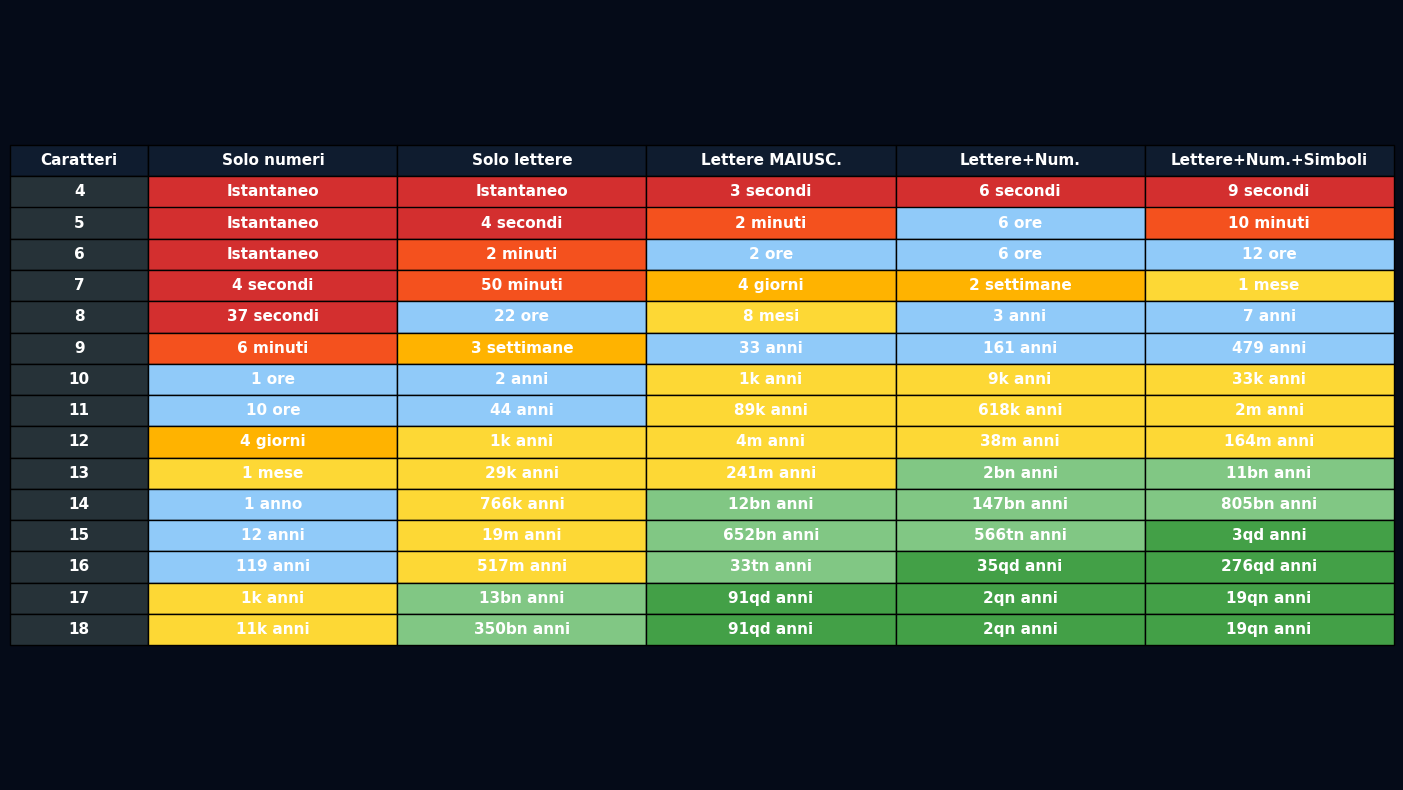

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica dataset
df = pd.read_csv("tempi_cracking_password_2024.csv")

# Rinominazione intestazioni lunghe per evitare sbordamenti
df.columns = [
    "Caratteri",
    "Solo numeri",
    "Solo lettere",
    "Lettere MAIUSC.",
    "Lettere+Num.",
    "Lettere+Num.+Simboli"
]

# Colore in base al valore
def color_map(val):
    val = str(val).lower()
    if "istantaneo" in val or "second" in val:
        return "#d32f2f"
    elif "minut" in val or "ora" in val:
        return "#f4511e"
    elif "giorni" in val or "settimane" in val:
        return "#ffb300"
    elif any(x in val for x in ["k", "m"]):
        return "#fdd835"
    elif any(x in val for x in ["bn", "tn"]):
        return "#81c784"
    elif any(x in val for x in ["qd", "qn"]):
        return "#43a047"
    return "#90caf9"

# Genera i colori
colors = []
for _, row in df.iterrows():
    row_colors = ["#263238"]  # prima colonna
    row_colors += [color_map(val) for val in row[1:]]
    colors.append(row_colors)

# Plot
fig, ax = plt.subplots(figsize=(14, 8))
ax.axis("off")

table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='center',
    cellColours=colors,
    colWidths=[0.10] + [0.18] * (df.shape[1] - 1),
    loc='center'
)

# Font e stile migliorati
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 1.5)

# Header visibile e leggibile
for col in range(len(df.columns)):
    cell = table[(0, col)]
    cell.set_facecolor("#0f1c2f")
    cell.set_text_props(color='white', fontweight='bold')

# Celle contenuto
for r in range(1, len(df) + 1):
    for c in range(len(df.columns)):
        table[(r, c)].set_text_props(color='white', fontweight='bold')

fig.patch.set_facecolor("#050b18")

plt.tight_layout()
plt.show()
